# Método de Newton-Raphson
## Prueba de derivación usando paquete de álgebra simbólica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


Algunos casos de ejemplo. **Correr solo la celda con el caso que se quiere probar.** También se puede cambiar la semilla (x0).
1. $f'(x^*) \neq 0$
2. $f'(x^*) = 0$
3. $\sin(x)$

In [55]:
#Caso 1
Sx = sym.Symbol('x')
Sf = Sx**2- 1 #función simbolica
x0 = 2.3 #semilla


In [39]:
#Caso 2
Sx = sym.Symbol('x')
Sf = (Sx-1)**2 #función simbolica
x0 = 2.3 #semilla


In [58]:
#Caso 3
Sx = sym.Symbol('x')
Sf = sym.sin(Sx-1) #función simbolica
x0 = 2.0 #semilla


In [52]:
#Caso 4
Sx = sym.Symbol('x')
Sf = sym.atan(Sx)-sym.pi/4 #función simbolica
x0 = 2.0 #semilla

In [59]:
plt_title = str(Sf) # devuelve la función en formato de string

Sdf = sym.diff(Sf, Sx)#derivada simbolica

f = sym.utilities.lambdify(Sx,Sf) #f es una función "estandar"
df = sym.utilities.lambdify(Sx,Sdf) #df es una función "estandar"

# Función de iteración
Sphi=Sx-Sf/Sdf
phi = sym.utilities.lambdify(Sx,Sphi)

tol = 1e-6 # Tolerancia: cuando la diferencia entre una aproximación y la siguente sea menor, se detiene
kmax=21 # Número máximo de iteraciones

# Extremos del intervalo de graficación de f(x)
xmin=0
xmax=2.49

# Genera los vectores para graficar, los xg están equiespaciados
xg=np.linspace(xmin,xmax,100)
yg=f(xg)


# Guarda primer punto de la secuencia (x0,0)
x = [x0]
y = [0]

# Inicialización: semilla
xprev = x0
# Inicialización: correcci'on inicial (arbitraria)
corr = 2*tol
# Inicialización: contador
k = 0
# Condiciones de parada:
# - correci'on menor o igual que tol
# - contador mayor o igual que kmax
# - norma de x mayor o igual que 3
while corr > tol and k < kmax and np.linalg.norm(xprev)<3:
    k += 1    # incrementa contador
#iteración propiamente dicha:  
    xnext=xprev-f(xprev)/df(xprev)
# Guarda un par de puntos de la secuencia:
# -Punto sobre y=f(x)
    x.append(xprev)
    y.append(f(xprev))
# -Punto sobre y=0
    x.append(xnext)
    y.append(0)
# Calcula cuánto fue la corrección
    corr=np.linalg.norm(xnext-xprev)
# Guarda último valor de la aproximación en xprev
    xprev = xnext
    

Text(0.5, 1.0, 'sin(x - 1)')

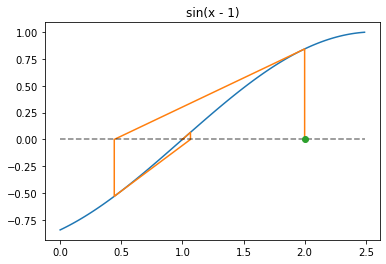

In [60]:
# Grafica: y=x, y=f(x), puntos de la secuencia y la recta y=0
plt.plot(xg, yg)
plt.plot(x, y)
plt.plot(xg,0*xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x0, 0, 'o') # semilla inicial
plt.title(plt_title)

(0.0, 2.49)

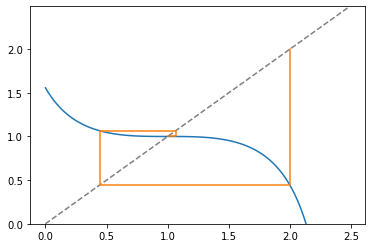

In [61]:
# Grafica: y=x, función de iteración
plt.plot(xg, phi(xg))
plt.plot(xg, xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x[0:-2], x[1:-1])
plt.gca().set_ylim(xmin, xmax)

